In [11]:
# Cell to install necessary libraries and handle imports
!pip install gspread gspread-dataframe google-auth graphviz opencv-python

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm  # Correction here, assuming you meant 'sm' instead of 'sample_data'

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import GridSearchCV

import gspread
from gspread_dataframe import get_as_dataframe
from google.oauth2.service_account import Credentials


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/38.8 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.4/38.8 MB 3.2 MB/s eta 0:00:13
    --------------------------------------- 0.7/38.8 MB 4.6 MB/s eta 0:00:09
   - -------------------------------------- 1.4/38.8 MB 7.2 MB/s eta 0:00:06
   --- ------------------------------------ 3.0/38.8 MB 13.6 MB/s eta 0:00:03
   ------ --------------------------------- 6.3/38.8 MB 25.2 MB/s eta 0:00:02
   --------- ------------------------------ 9.1/38.8 MB 30.6 MB/s eta 0:00:01
   -------------- ------------------------- 13.7/38.8 MB 93.9 MB/s eta 0:00:01
   ------------------ --------------------- 17.8/38.8 MB 110.0 MB/s eta 0:00:01
   -------------------- ------------------- 19.8/38.8 MB 93.0 MB/s eta 0:00:01
   ------------------------- -------------- 24.8/38.8 MB 93.9 MB/s eta 0:

In [41]:
data = pd.read_csv('credit_card_default.csv')
data

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [42]:
data.isna().sum() / len(data) * 100

ID           0.0
LIMIT_BAL    0.0
GENDER       0.0
EDUCATION    0.0
MARRIAGE     0.0
AGE          0.0
PAY_1        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
BILL_AMT1    0.0
BILL_AMT2    0.0
BILL_AMT3    0.0
BILL_AMT4    0.0
BILL_AMT5    0.0
BILL_AMT6    0.0
PAY_AMT1     0.0
PAY_AMT2     0.0
PAY_AMT3     0.0
PAY_AMT4     0.0
PAY_AMT5     0.0
PAY_AMT6     0.0
DEFAULT      0.0
dtype: float64

In [43]:
# Assuming 'data' is already imported as a DataFrame
# Calculate the percentage of '0' in each column
percentage_zeros = data.apply(lambda x: (x <= 0).mean() * 100)

# Print the result
print(percentage_zeros)

# the focus should be on the education and marriage,
# we have already decided that zeros in pays are regarded as fully paid and zeros in bills and payments are reasonable since there no need to be positive value for a statement or a payment.


ID            0.000000
LIMIT_BAL     0.000000
GENDER        0.000000
EDUCATION     0.046667
MARRIAGE      0.180000
AGE           0.000000
PAY_1        77.273333
PAY_2        85.206667
PAY_3        85.956667
PAY_4        88.300000
PAY_5        90.106667
PAY_6        89.736667
BILL_AMT1     8.660000
BILL_AMT2    10.583333
BILL_AMT3    11.750000
BILL_AMT4    12.900000
BILL_AMT5    13.870000
BILL_AMT6    15.693333
PAY_AMT1     17.496667
PAY_AMT2     17.986667
PAY_AMT3     19.893333
PAY_AMT4     21.360000
PAY_AMT5     22.343333
PAY_AMT6     23.910000
DEFAULT      77.880000
dtype: float64


In [44]:
# Get the "Mode" from each column in case it can be used as the fill up the missing values.
def get_modes_for_columns(df, column_list):
    modes = {}
    for column in column_list:
        mode_value = df[column].mode().iloc[0] if not df[column].mode().empty else None
        modes[column] = mode_value
    return pd.Series(modes)

df = data
column_list = ['EDUCATION',	
               'MARRIAGE']  

modes_series = get_modes_for_columns(df, column_list)
print("Modes for selected columns:")
print(modes_series)


Modes for selected columns:
EDUCATION    2
MARRIAGE     2
dtype: int64


In [45]:
# Replace '0' with '2' in the 'EDUCATION' and 'MARRIAGE' columns
data['EDUCATION'].replace(0, 2, inplace=True)
data['MARRIAGE'].replace(0, 2, inplace=True)

# Verify the changes by displaying the unique values in these columns
print("Unique values in EDUCATION:", data['EDUCATION'].unique())
print("Unique values in MARRIAGE:", data['MARRIAGE'].unique())
# check if there is any invalid value for the GENDER Column
print("Unique values in GENDER:", data['GENDER'].unique())

Unique values in EDUCATION: [2 1 3 5 4 6]
Unique values in MARRIAGE: [1 2 3]
Unique values in GENDER: [2 1]


C:\Users\Admin\AppData\Local\Temp\ipykernel_11836\3089141876.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['EDUCATION'].replace(0, 2, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11836\3089141876.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [46]:
# '6' is not a defined education level mentioned in the dictionary
# Drop rows where the 'EDUCATION' column has the value '6'
data_clean = data[data['EDUCATION'] != 6]

# Verify the operation by displaying the unique values in the 'EDUCATION' column
print("Unique values in EDUCATION after removal:", data_clean['EDUCATION'].unique())


Unique values in EDUCATION after removal: [2 1 3 5 4]


In [47]:
data_clean

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [48]:
data_clean.to_csv('cleaned_data.csv', index=False)

print("The cleaned data has been saved to 'cleaned_data.csv'.")


The cleaned data has been saved to 'cleaned_data.csv'.


In [3]:
cre_data = pd.read_csv('cleaned_data.csv')
df = pd.DataFrame(cre_data)
df.head()

# preview data
df.info()
df.head
print(df)

# total count of NaN values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29949 entries, 0 to 29948
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         29949 non-null  int64
 1   LIMIT_BAL  29949 non-null  int64
 2   GENDER     29949 non-null  int64
 3   EDUCATION  29949 non-null  int64
 4   MARRIAGE   29949 non-null  int64
 5   AGE        29949 non-null  int64
 6   PAY_1      29949 non-null  int64
 7   PAY_2      29949 non-null  int64
 8   PAY_3      29949 non-null  int64
 9   PAY_4      29949 non-null  int64
 10  PAY_5      29949 non-null  int64
 11  PAY_6      29949 non-null  int64
 12  BILL_AMT1  29949 non-null  int64
 13  BILL_AMT2  29949 non-null  int64
 14  BILL_AMT3  29949 non-null  int64
 15  BILL_AMT4  29949 non-null  int64
 16  BILL_AMT5  29949 non-null  int64
 17  BILL_AMT6  29949 non-null  int64
 18  PAY_AMT1   29949 non-null  int64
 19  PAY_AMT2   29949 non-null  int64
 20  PAY_AMT3   29949 non-null  int64
 21  PAY_AMT4   2

In [4]:
df

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29944,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29945,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29946,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29947,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Split data into training and test sets

Before splitting
*   Separate X and y variables into separate data frames
*   Create dummy variables

In [5]:
# split the data into training and testing sets
X = df.drop(['DEFAULT'], axis=1)

y = df['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20964 entries, 25598 to 23654
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         20964 non-null  int64
 1   LIMIT_BAL  20964 non-null  int64
 2   GENDER     20964 non-null  int64
 3   EDUCATION  20964 non-null  int64
 4   MARRIAGE   20964 non-null  int64
 5   AGE        20964 non-null  int64
 6   PAY_1      20964 non-null  int64
 7   PAY_2      20964 non-null  int64
 8   PAY_3      20964 non-null  int64
 9   PAY_4      20964 non-null  int64
 10  PAY_5      20964 non-null  int64
 11  PAY_6      20964 non-null  int64
 12  BILL_AMT1  20964 non-null  int64
 13  BILL_AMT2  20964 non-null  int64
 14  BILL_AMT3  20964 non-null  int64
 15  BILL_AMT4  20964 non-null  int64
 16  BILL_AMT5  20964 non-null  int64
 17  BILL_AMT6  20964 non-null  int64
 18  PAY_AMT1   20964 non-null  int64
 19  PAY_AMT2   20964 non-null  int64
 20  PAY_AMT3   20964 non-null  int64
 21  PAY_AMT4   20

# Decision Tree  
We will use 3 parameters to control the growth of the tree

- **max_depth** determines the maximum number of levels for the tree.  Smaller values help to prevent overfitting.  Default value = None

- **min_samples_leaf** determines the minimum number of observations that must remain in a leaf.  If a split leaves fewer than this number of observations, the split cannot be performed.  Larger values help to prevent overfitting.  Default value = 1.

- **ccp_alpha** is the cost complexity parameter and can be used for post-pruning the tree to help prevent overfitting.  Default value = 0.  Larger values yield a smaller tree.

In [6]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth = 25, min_samples_leaf=10, ccp_alpha = 0.001)

# fit the model to the training data
dt.fit(X_train, y_train)

# this code can be used to produce a textual representation of the tree if desired
#text_rep = tree.export_text(dt)
#print(text_rep)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=25, min_samples_leaf=10)

In [7]:
import os

# Get the path of the Graphviz executables
graphviz_path = 'C:/Program Files/Graphviz/bin'  # Replace with the actual path on your system

# Add the Graphviz path to the system's path
os.environ["PATH"] += os.pathsep + graphviz_path

In [8]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree_default")

'decision_tree_default.pdf'

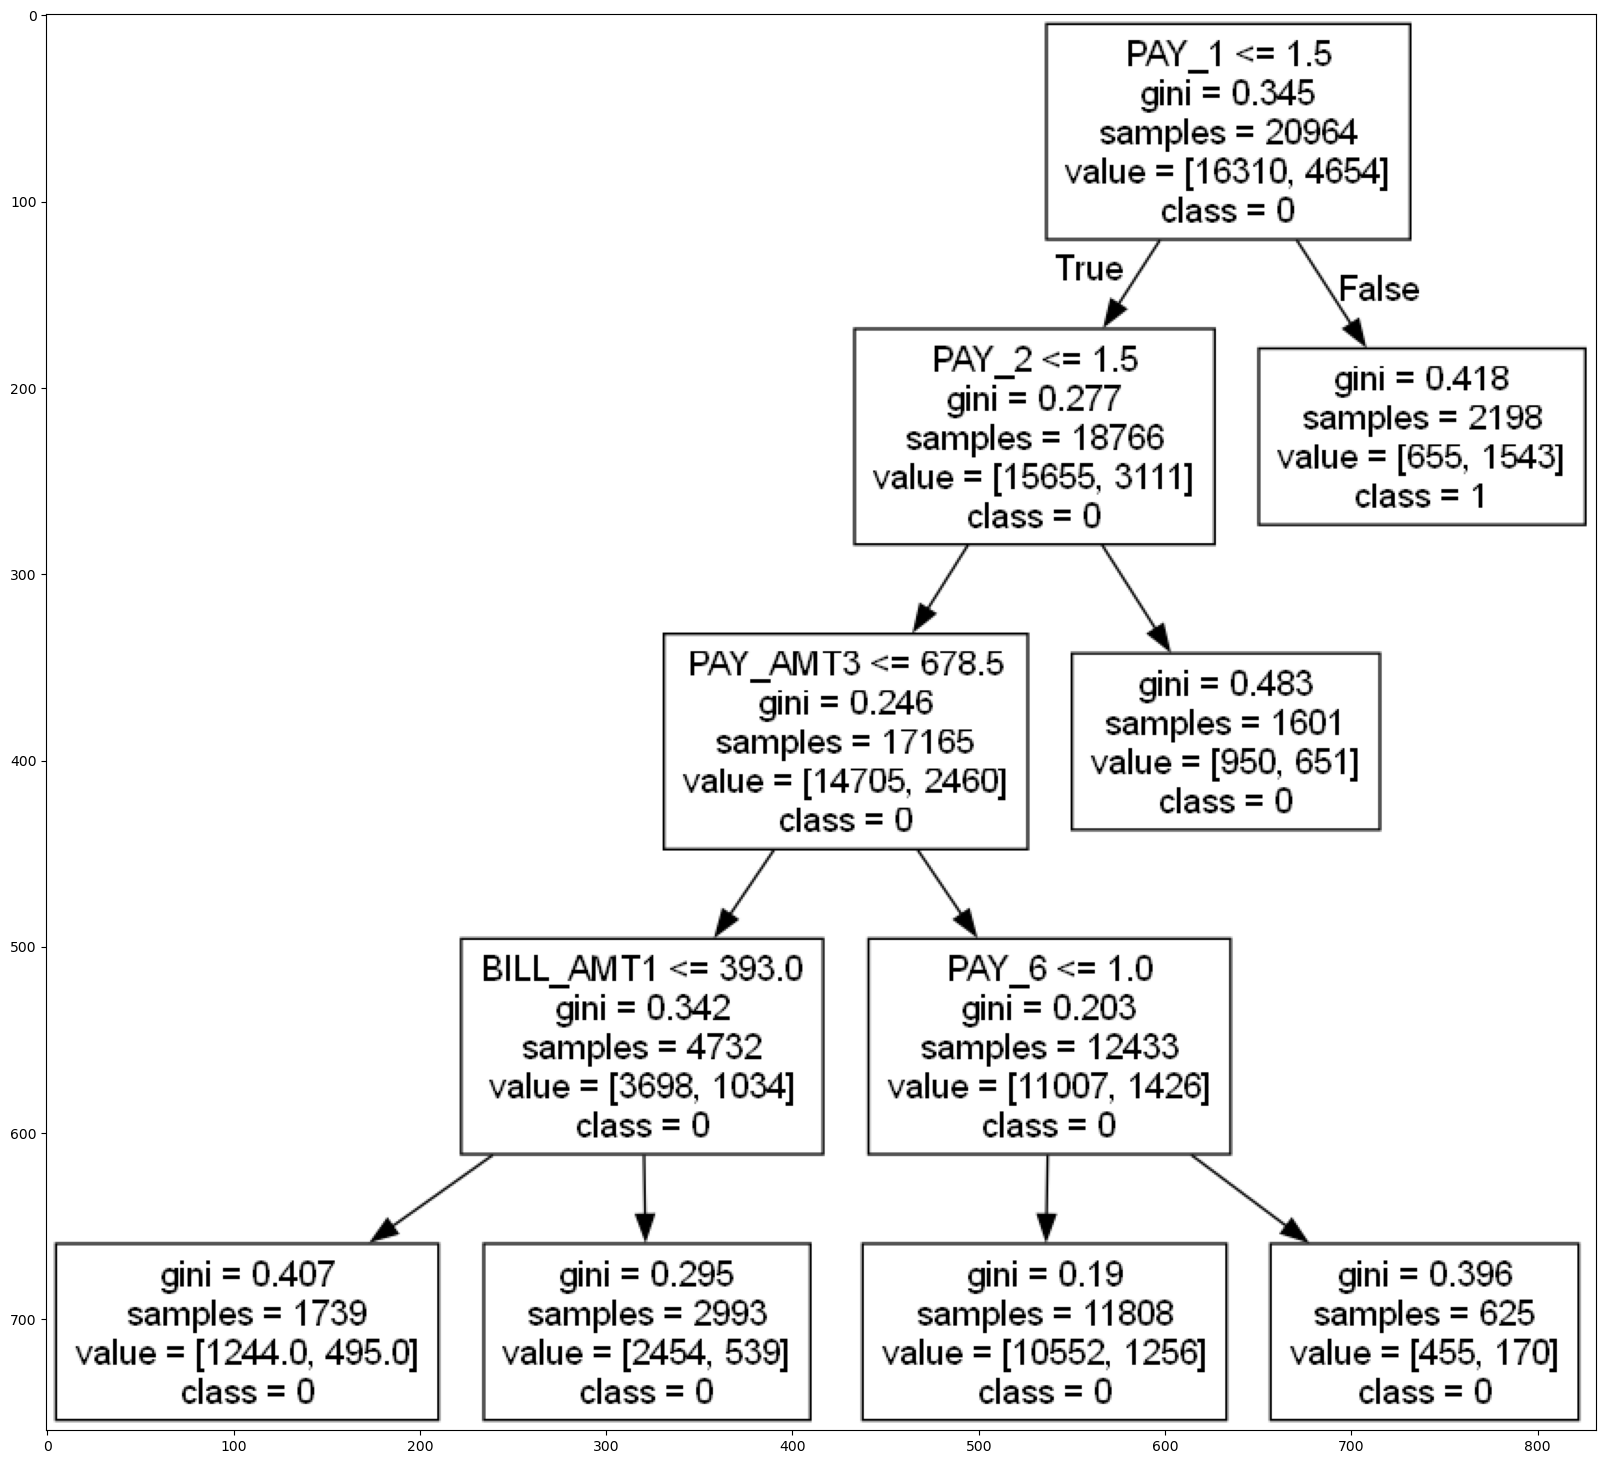

In [12]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

# Make Predictions on the training and test data


In [14]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)

## Assess Model on Training and Test data

In [15]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8204
Precision: 0.7020
Recall.  : 0.3315

 -- test set -- 
Accuracy : 0.8180
Precision: 0.6828
Recall.  : 0.3207


In [16]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[15655  3111]
 [  655  1543]]
[[6717 1341]
 [ 294  633]]


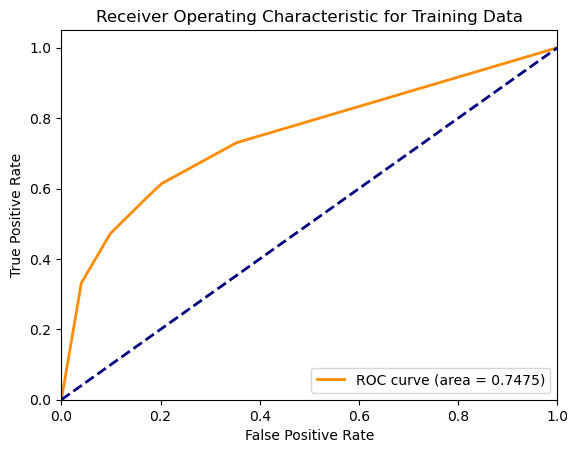

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Ensure y_train is in an integer format
y_train_encoded = y_train if y_train.dtype in ['int', 'float'] else y_train.astype('int')

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_train_encoded, y_prob_train[:, 1])
roc_auc = roc_auc_score(y_train_encoded, y_prob_train[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

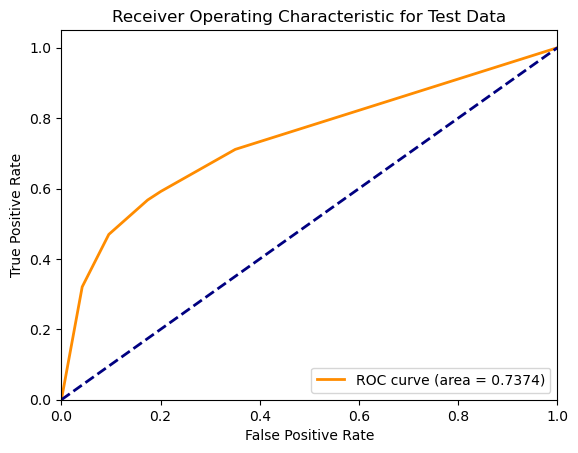

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Ensure y_test is in an integer format
y_test_encoded = y_test if y_test.dtype in ['int', 'float'] else y_test.astype('int')

# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob_test[:, 1])
roc_auc = roc_auc_score(y_test_encoded, y_prob_test[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()